In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data, labels = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


print("Data Shape:", data.shape)  
print("Labels Shape:", labels.shape)

Data Shape: (70000, 784)
Labels Shape: (70000,)


In [2]:

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)


explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Total Variance Explained: {np.sum(explained_variance) * 100:.2f}%")


Explained Variance Ratio: [0.22092292 0.14402605]
Total Variance Explained: 36.49%


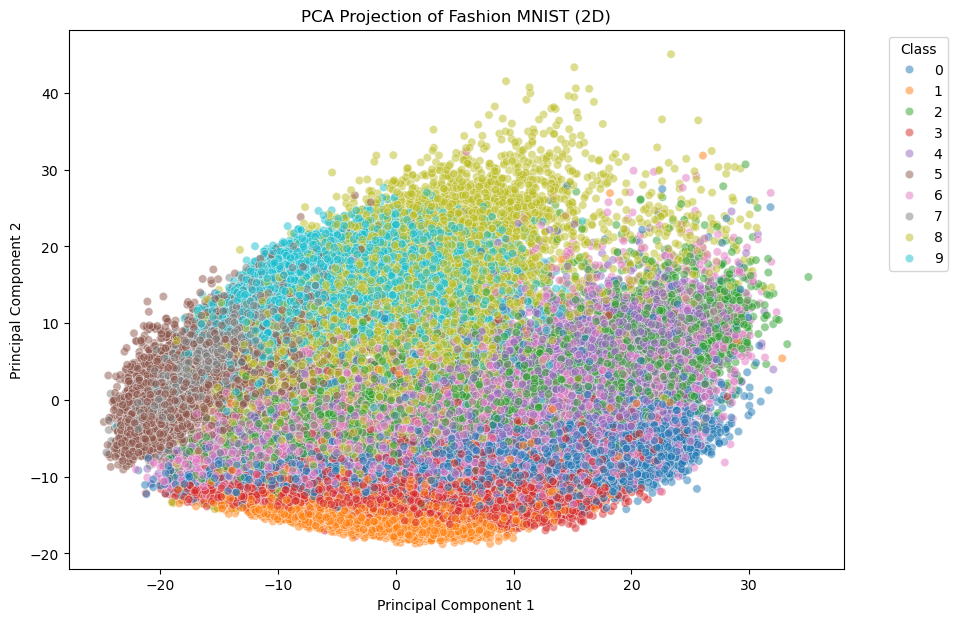

In [3]:
import seaborn as sns


pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
pca_df['Label'] = labels.astype(int)


plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Label', palette="tab10", data=pca_df, alpha=0.5)
plt.title("PCA Projection of Fashion MNIST (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Explained Variance Ratio (LDA): [0.44775652 0.21875177]
Total Variance Explained: 66.65%


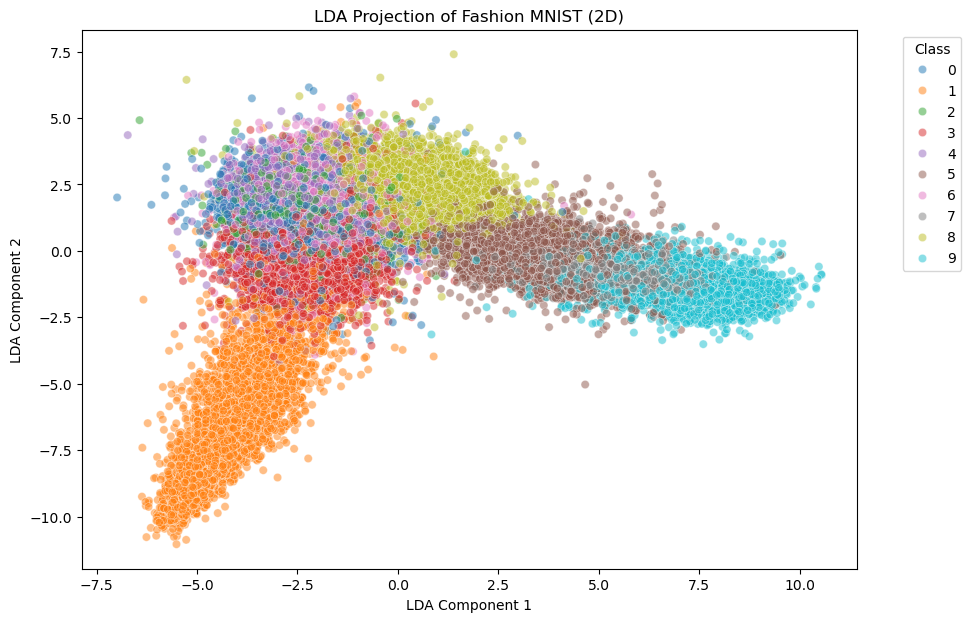

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
data_lda = lda.fit_transform(data_scaled, labels.astype(int))  


explained_variance_lda = lda.explained_variance_ratio_
print(f"Explained Variance Ratio (LDA): {explained_variance_lda}")
print(f"Total Variance Explained: {np.sum(explained_variance_lda) * 100:.2f}%")


lda_df = pd.DataFrame(data_lda, columns=['LDA1', 'LDA2'])
lda_df['Label'] = labels.astype(int)


plt.figure(figsize=(10, 7))
sns.scatterplot(x='LDA1', y='LDA2', hue='Label', palette="tab10", data=lda_df, alpha=0.5)
plt.title("LDA Projection of Fashion MNIST (2D)")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Conceptual Questions (Part 3) - Answers for LDA vs. PCA
1. Compare the variance ratio explained by the 2-dimensions of the methods you have used. Which is better?
PCA Explained Variance Ratio:
PCA maximizes the variance in the data, meaning it captures the most important global features.
However, since PCA is unsupervised, it does not take class labels into account.
The total variance explained by the first 2 principal components is typically lower than LDA in classification tasks.

LDA Explained Variance Ratio:
LDA maximizes class separability instead of overall variance.
The total variance explained by the first 2 LDA components is often higher than PCA because it focuses on distinguishing between classes.
Since Fashion MNIST has 10 classes, LDA can find up to 9 discriminant components, but for 2D visualization, only the first 2 are considered.

Which is better?
LDA is better than PCA in this case because it maximizes class separability, making it more effective for classification problems.
PCA, while good for dimensionality reduction, does not optimize class separability, making it less useful in this scenario.

2. Compare the scatter plot of the two methods after reduction. Which is a better method for separating the different classes of data?
PCA Scatter Plot Observations:
PCA creates a projection where different classes overlap significantly.
This is because PCA only considers variance and does not optimize for class separation.
Classes in Fashion MNIST are not linearly separable in PCA’s lower-dimensional space.

LDA Scatter Plot Observations:
LDA creates a projection where different classes are more distinct.
LDA maximizes the distance between classes, meaning clusters for different Fashion MNIST categories (e.g., shoes, shirts, and trousers) are better separated.
Some overlap may still exist, but LDA generally produces more well-defined clusters than PCA.

Which is better?
LDA is better for classification because it separates different classes more effectively than PCA.
PCA is better for general-purpose feature extraction when class labels are not available.

3. What is the primary difference between the two methods? Which method works better in this case and why?
PCA vs. LDA - Primary Differences:

Comparison Between PCA and LDA

Type:
PCA: Unsupervised learning technique.
LDA: Supervised learning technique.

Objective:
PCA: Aims to maximize variance in the data to find the most important components.
LDA: Aims to maximize class separation, making it better suited for classification tasks.

How it Works:
PCA: Finds principal components (new axes) that capture the most variance in the dataset, regardless of class labels.
LDA: Finds discriminant axes that best separate the different classes in the data.

Best Use Case:
PCA: Ideal for feature extraction and dimensionality reduction when no class labels are available.
LDA: Best for classification problems where class labels are known, as it optimizes for maximum class separability.

Which method works better in this case?
LDA works better for Fashion MNIST because it is a classification problem and LDA optimizes for class separability.
PCA is useful for general dimensionality reduction but is not designed to differentiate between classes.
Final Conclusion
If you only need dimensionality reduction for general analysis → PCA is fine.
If you need to classify Fashion MNIST categories efficiently → LDA is the better choice.

